# Deep Neural Networks (DNN)

DNN is a classic deep learning algorithm.The optimization is derived from back propagation. Here we will try to build a model using python and tensorflow built-in respectively with MNIST dataset. MNIST dataset contains images of handwritten numbers and labels.

## Load MNIST dataset 

In [39]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import sys, os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [49]:
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets
mnist = read_data_sets("MNIST_data/", one_hot=True,reshape=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [51]:
x_train_origin = mnist.train.images
t_train_origin = mnist.train.labels
x_test_origin = mnist.test.images
t_test_origin = mnist.test.labels

m_train = x_train_origin.shape[0] 
m_test = x_test_origin.shape[0] 
num_px = x_train_origin.shape[1] 

num_category = 10 

print("number of trainning sample is :"+repr(m_train))
print("number of test sample is :"+repr(m_test))
print("shape of x_train is :"+repr(x_train_origin.shape))
print("shape of t_train is :"+repr(t_train_origin.shape))
print("shape of x_test is :"+repr(x_test_origin.shape))
print("shape of t_test is :"+repr(t_test_origin.shape))

number of trainning sample is :55000
number of test sample is :10000
shape of x_train is :(55000, 784)
shape of t_train is :(55000, 10)
shape of x_test is :(10000, 784)
shape of t_test is :(10000, 10)


In [52]:
train_set_x = x_train_origin.T
train_set_y = t_train_origin.T
test_set_x = x_test_origin.T
test_set_y  = t_test_origin.T

print("shape of train_set_x is :"+repr(train_set_x.shape))
print("shape of train_set_y is :"+repr(train_set_y.shape))
print("shape of test_set_x is :"+repr(test_set_x.shape))
print("shape of test_set_y is :"+repr(test_set_y.shape))

shape of train_set_x is :(784, 55000)
shape of train_set_y is :(10, 55000)
shape of test_set_x is :(784, 10000)
shape of test_set_y is :(10, 10000)


y is:8


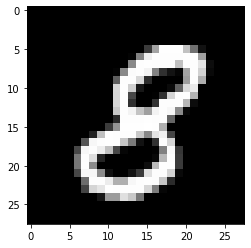

In [55]:
# check a random  image and lable 
index = 5
plt.imshow(x_train_origin[index].reshape((28,28)),cmap = plt.cm.gray)
print("y is:"+str(np.argmax(t_train_origin[index])))

## Build DNN (native python)

###  step 1 - sigmoid function

In [57]:
def sigmoid(z):
    """
    sigmoid function = 1/(1+exp(-z))
    """
    return 1/(1+np.exp(-z))

In [58]:
# check 
sigmoid(100),sigmoid(0),sigmoid(-1000)

(1.0, 0.5, 0.0)

### step 2 - initialize params w, b (weights in hidden layer)

In [67]:
def initialize(dim, num_cat):
    """
    dim - size of w
    num_cat - label types 
    """
    w = np.zeros((dim, num_cat))
    b = np.zeros((num_cat,1))
    return w,b

### step 3 - propagation

In [70]:
def propagate(w,b,X,Y):
    """
    Inputs
    w : weights
    b: bias
    X: input
    Y: label
    return 
        grad - dw, db
        cost
    """
    m = X.shape[1]
    # forward propagation
    yhat = sigmoid(np.dot(w.T, X) + b)
    cost = -np.sum((Y*np.log(yhat))+(1-Y)*np.log(1-yhat))/m
    
    # backward propagation
    dw = np.dot(X, (yhat-Y).T)/m
    db = np.sum((yhat - Y),axis=1)/m
    db = db.reshape(b.shape)
    
    return dw,db,cost
    

### step 4 - optimizer

In [88]:
def optimize(w,b,X,Y,num_iter,learning_rate):
    costs = []
    for i in range(num_iter):
        dw,db,cost = propagate(w,b,X,Y)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if (i%50)==0:
            costs.append(cost)
            print('cost at iteration %d:%.5f'%(i,cost))
    return {'w':w,'b':b},{'dw':dw,'db':db}, costs

### step 5 - predict

In [90]:
def predict(X,w,b):
    m = X.shape[1]
    yhats = sigmoid(np.dot(w.T,X) + b).T
    y_pred_one_hot = np.zeros((b.shape[0],m))
    y_pred_num = np.zeros((1,m))
    for i in range(yhats.shape[0]):
        max_idx = np.argmax(yhats[i])
        y_pred_one_hot[max_idx,i] = 1
        y_pred_num[0,i] =int(max_idx)
    return y_pred_one_hot, y_pred_num
        

### step 6 - test model

In [92]:
def model_DNN(train_set_x, train_set_y, test_set_x, test_set_y, num_cat, num_iter=2000, learning_rate=0.5):
        """
    construct a model to predicate number picture
    Arguments:
        train_set_x-- training data,numpy array of shape(num_px*num_px,number of examples)
        train_set_y -- the tag of trainning data  of shape (num_categories,number of examples)
        test_set_x -- test examples,numpy array of shape (num_px*num_px,number of examples)
        test_set_y -- the tag of test  data  of shape (num_categories,number of examples)
        num_cat -- number of categories
        number_iterations -- the number of iterate for optimize
        learning_rate --

        Return :
        d -- dictionary contain info for model
    """
        dim = train_set_x.shape[0]
        # init w and b
        w, b = initialize(dim, num_cat)
        params, grads, costs = optimize(
            w, b, train_set_x, train_set_y, num_iter=num_iter, learning_rate=learning_rate)
        w = params["w"]
        b = params["b"]

        Y_pred_train_one_hot, Y_pred_train_num = predict(
            train_set_x, w, b)
        Y_pred_test_one_hot, Y_pred_test_num = predict(
            test_set_x, w, b)

        print("train accuracy: {} %".format(
            100 - np.mean(np.sum(np.abs(Y_pred_train_one_hot - train_set_y), axis=0)/2) * 100))
        print("test accuracy: {} %".format(
            100 - np.mean(np.sum(np.abs(Y_pred_test_one_hot - test_set_y), axis=0)/2) * 100))

       
        return {"w":w,
             "b":b,
            "costs":costs,
            "Y_pred_train":Y_pred_train_num,
            "Y_pred_train_one_hot":Y_pred_train_one_hot,
            "Y_pred_test":Y_pred_test_num,
            "Y_pred_test_one_hot":Y_pred_test_one_hot,
            "learning_rate":learning_rate,
            "iterations":num_iter}

In [93]:
import time
starttime = time.time()
number_categories = 10 
d = model_DNN(train_set_x,train_set_y,test_set_x,test_set_y,num_cat = 10,num_iter=1000,learning_rate=0.6)
print('time: ',(time.time()-starttime))

cost at iteration 0:6.93147
cost at iteration 50:1.02978
cost at iteration 100:0.90729
cost at iteration 150:0.85156
cost at iteration 200:0.81746
cost at iteration 250:0.79367
cost at iteration 300:0.77578
cost at iteration 350:0.76166
cost at iteration 400:0.75015
cost at iteration 450:0.74052
cost at iteration 500:0.73231
cost at iteration 550:0.72520
cost at iteration 600:0.71897
cost at iteration 650:0.71345
cost at iteration 700:0.70851
cost at iteration 750:0.70406
cost at iteration 800:0.70003
cost at iteration 850:0.69635
cost at iteration 900:0.69298
cost at iteration 950:0.68987
train accuracy: 91.21454545454546 %
test accuracy: 91.68 %
time:  644.4439554214478


### Results

y is:6
y_pred is:6


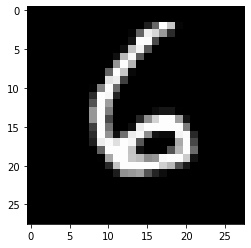

In [101]:
index = 600
y_pred_test = d["Y_pred_test"]
plt.imshow(test_set_x[:,index].reshape((28,28)),cmap = plt.cm.gray)
print("y is:"+str(np.argmax(test_set_y[:,index])))
print("y_pred is:"+str(int(y_pred_test[0,index])))

Text(0.5, 0, 'iterations/hundreds')

Text(0, 0.5, 'costs')

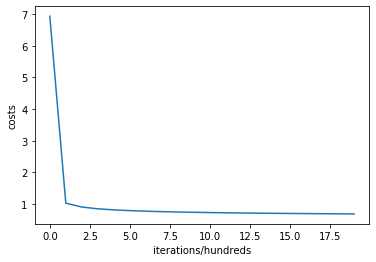

In [102]:
# cost 
plt.plot(d['costs'])
plt.xlabel("iterations/hundreds")
plt.ylabel("costs")
plt.show()

## Build Model with Tensorflow

In [ ]:
mnist = read_data_sets("MNIST_data/", one_hot=True,reshape=True)

In [114]:
fea_num =784
num_cat = 10
learning_rate = 0.5

# define params(weights, features, label)
x = tf.placeholder(tf.float32, [None, fea_num])
W = tf.Variable(tf.zeros([fea_num, num_cat]))
b = tf.Variable(tf.zeros([num_cat]))
y = tf.matmul(x, W) + b
y_ = tf.placeholder(tf.float32, [None, num_cat])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs/DNN',sess.graph)
    tf.global_variables_initializer().run()
    # training with 100 samples per epoch
    for _ in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

    # check prediction
    correct_prediction = tf.equal(tf.arg_max(y, 1), tf.arg_max(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(sess.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
writer.close()

0.9191
